# Descargamos el DataSet

In [69]:
#@title Descarga del dataset
!git clone https://github.com/chentinghao/download_google_drive.git
!cd download_google_drive
!python download_google_drive/download_gdrive.py "144zh3Pg8Xu7XZNoUeIBgABU02-VHexwO" "creditcard.csv"

fatal: destination path 'download_google_drive' already exists and is not an empty directory.
144MB [00:00, 197MB/s]


In [70]:
#@title Importamos librerias y definimos la ruta del DataSet
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy.random import seed
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report





%matplotlib inline

np.random.seed(34)
path = '/content/creditcard.csv'

In [71]:
#Muestra de como se encuentra el dataset
data = pd.read_csv(path)
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


0    284315
1       492
Name: Class, dtype: int64

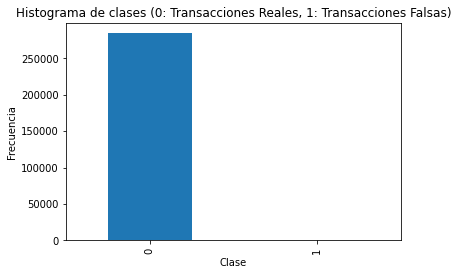

In [72]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Histograma de clases (0: Transacciones Reales, 1: Transacciones Falsas)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
data['Class'].value_counts()

#Tratamiento de datos

In [73]:
#@title Normalización de la columna monto usando StandardScaler
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [74]:
X = data.values[:,:-1]
#y = np.expand_dims(data["Class"].values,1)
y = data["Class"].values
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807,)


In [ ]:
#@title División del DataSet entre entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

pd.plotting.scatter_matrix(data,alpha=0.2)

#Clasificador

In [ ]:
# Under sampling d
#@title Submuestreo a los datos, para balancear un poco mejor las clases
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X_train, y_train)


X_res = X_train
y_res = y_train
print(X_res.shape)
print(y_res.shape)

(227845, 29)
(227845,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


El clasificador escogido es "LogisticRegression" el cual es un algoritmo de aprendizaje supervisado. El objetivo de usar un clasificador como método de evaluación es el comparar cómo afectan los diferentes conjuntos de datos generados sobre la clasificación 

In [ ]:
#Encontrar el parametro optimo "C" 
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_res, y_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   23.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
best_param = clf.best_params_
best_param = best_param['C']  

In [ ]:
import itertools
lr1 = LogisticRegression(C=best_param,penalty='l2', verbose=5)
lr1.fit(X_res, y_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


LogisticRegression(C=7.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Metrica de Recall en el dataset de Testeo: 82.65306122448979%
Metrica de presición en el dataset de testeo: 99.96903517240123%


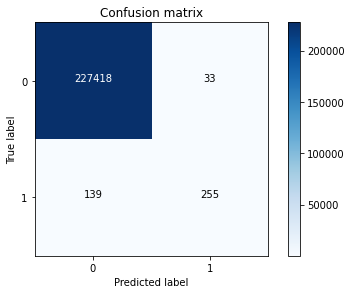

In [ ]:
y_train_pre = lr1.predict(X_res)

cnf_matrix_tra = confusion_matrix(y_res, y_train_pre)

print("Metrica de Recall en el dataset de Testeo: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Metrica de presición en el dataset de testeo: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Metrica de Recall en el dataset de Testeo: 59.183673469387756%
Metrica de presición en el dataset de testeo: 99.92969258080959%


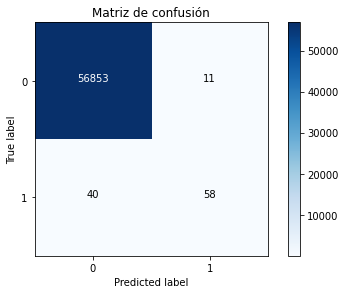

In [ ]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Metrica de Recall en el dataset de Testeo: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Metrica de presición en el dataset de testeo: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Matriz de confusión')
plt.show()

En nuestro enfoque, cada generador creara un nuevo conjunto de datos (con datos balanceados) de entrenamiento para el clasificador, comparando los resultados de los diferentes entrenamiento contra el mismo conjunto de Test y comprobar qué método resulta más eficaz para resolver el problema propuesto. 

#SMOTE

In [ ]:
# Under sampling d
#@title Submuestreo a los datos, para balancear un poco mejor las clases
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(ratio = {0:1024, 1: 394},random_state=42)
X_res_smote, y_res_smote = rus.fit_sample(X_train, y_train)
print(X_res_smote.shape)
print(y_res_smote.shape)


(1418, 29)
(1418,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#@title Implementacion SMOTE

# Vemos la cantidad de datos por cada clase antes del SMOTEX_res_smote
y_res_smote
print("Antes del sobremuestreo, conteo de clases '1': {}".format(sum(y_res_smote==1)))
print("Antes del sobremuestreo, conteo de clases '0': {} \n".format(sum(y_res_smote==0)))

smote_model = SMOTE(random_state=2)
X_train_res, y_train_res = smote_model.fit_sample(X_res_smote, y_res_smote)

print('\nDespués del sobre muestreo, dimensiones del conjunto train_X: {}'.format(X_train_res.shape))
print('Después del sobre muestreo, dimensiones del conjunto train_y: {} \n'.format(y_train_res.shape))

print("Después del sobre muestreo, conteo de clases '1': {}".format(sum(y_train_res==1)))
print("Después del sobre muestreo, conteo de clases '0': {}".format(sum(y_train_res==0)))

Antes del sobremuestreo, conteo de clases '1': 394
Antes del sobremuestreo, conteo de clases '0': 1024 


Después del sobre muestreo, dimensiones del conjunto train_X: (2048, 29)
Después del sobre muestreo, dimensiones del conjunto train_y: (2048,) 

Después del sobre muestreo, conteo de clases '1': 1024
Después del sobre muestreo, conteo de clases '0': 1024


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#Entrenamiento clasificador con datos aumentados

In [ ]:
#@title LogisticRegression SMOTE
#Encontrar el parametro optimo "C" 
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
#@title Mejor parametro y entrenamiento
best_param = clf.best_params_
best_param = best_param['C'] 
lr1 = LogisticRegression(C=best_param,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel()) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

Metrica de Recall en el dataset de Testeo: 87.75510204081633%
Metrica de presición en el dataset de testeo: 99.97834990167247%


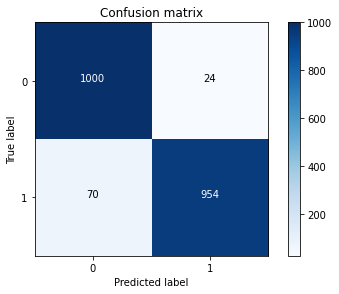

In [ ]:
y_train_pre = lr1.predict(X_train_res)

cnf_matrix_tra = confusion_matrix(y_train_res, y_train_pre)

print("Metrica de Recall en el dataset de Testeo: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Metrica de presición en el dataset de testeo: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Metrica de Recall en el dataset de Testeo: 88.77551020408163%
Metrica de presición en el dataset de testeo: 99.98012072143709%


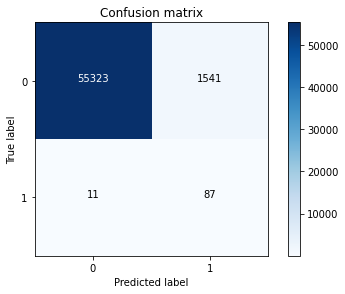

In [ ]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Metrica de Recall en el dataset de Testeo: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Metrica de presición en el dataset de testeo: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

#GAN

In [ ]:
#Gan libs

os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input, Embedding, multiply, BatchNormalization
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers
from keras.utils import to_categorical


np.random.seed(1000)
randomDim = 10

In [ ]:
#@title Creación del generador y discriminador
def build_generator(latent_dim,data_dim):

        model = Sequential()

        model.add(Dense(16, input_dim=latent_dim))
    
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(32, input_dim=latent_dim))
    
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(data_dim,activation='tanh'))

        model.summary()

        noise = Input(shape=(latent_dim,))
        img = model(noise)

        return Model(noise, img)

In [ ]:
def build_discriminator(data_dim,num_classes):
    model = Sequential()
    model.add(Dense(31,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dropout(0.25))
    model.add(Dense(16,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    
    model.summary()
    img = Input(shape=(data_dim,))
    features = model(img)
    valid = Dense(1, activation="sigmoid")(features)
    label = Dense(num_classes+1, activation="softmax")(features)
    return Model(img, [valid, label])

In [ ]:
generator = build_generator(latent_dim=10,data_dim=29)
discriminator = build_discriminator(data_dim=29,num_classes=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 29)                9

In [ ]:
#@title Compilar el modelo
optimizer = Adam(0.0002, 0.5)
discriminator.compile(loss=['binary_crossentropy', 'categorical_crossentropy'],
    loss_weights=[0.5, 0.5],
    optimizer=optimizer,
    metrics=['accuracy'])

In [ ]:
noise = Input(shape=(10,))
img = generator(noise)
discriminator.trainable = False
valid,_ = discriminator(img)
combined = Model(noise , valid)
combined.compile(loss=['binary_crossentropy'],
    optimizer=optimizer)

In [ ]:
X_train.shape

In [ ]:
#@title Submuestreo a los datos, para balancear un poco mejor las clases
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

rus = RandomUnderSampler(ratio = {0:1024, 1: 394},random_state=42)
X_res, y_res = rus.fit_sample(X_train, y_train)
print(X_res.shape)
print(y_res.shape)



(1418, 29)
(1418,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##Definición de la función de entrenamiento de la GAN

In [ ]:
def train(X_train,y_train,
          X_test,y_test,
          generator,discriminator,
          combined,
          num_classes,
          epochs, 
          batch_size=128):
    
    f1_progress = []
    d_loss_progress = []
    half_batch = int(batch_size / 2)

    noise_until = epochs

    #cw1 = {0: 1, 1: 1}
    #cw2 = {i: num_classes / half_batch for i in range(num_classes)}
    #cw2[num_classes] = 1 / half_batch 

    d_loss_sum = 0

    for epoch in range(epochs):

        # ---------------------
        #  Entrenamiento del  Discriminator
        # ---------------------

        # Select a random batch
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

        # Se genera un ruido y se genera un nuevo batch
        noise = np.random.normal(0, 1, (half_batch, 10))
        gen_imgs = generator.predict(noise)

        #Clases
        valid = np.ones((half_batch, 1))
        fake = np.zeros((half_batch, 1))

        labels = to_categorical(y_train[idx], num_classes=num_classes+1)#
        #print("Labels: ",labels)
        fake_labels = to_categorical(np.full((half_batch, 1), num_classes), num_classes=num_classes+1)#
        #print("fake_labels: ",fake_labels)
        # Entrenamiento Discriminador
        d_loss_real = discriminator.train_on_batch(imgs, [valid, labels])
        d_loss_fake = discriminator.train_on_batch(gen_imgs, [fake, fake_labels])
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Entrenamiento Generador
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, 10))
        validity = np.ones((batch_size, 1))

        #  Entrenamiento Generador
        g_loss = combined.train_on_batch(noise, validity)

        # Plot the progress
        print ("%d [D loss: %f, acc: %.2f%%, op_acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[3], 100*d_loss[4], g_loss))
        d_loss_sum += 100*d_loss[3]
        
        if epoch % 10 == 0:
            _,y_pred = discriminator.predict(X_test,batch_size=batch_size)
            #print(y_pred.shape)
            y_pred = np.argmax(y_pred[:,:-1],axis=1)
            
            f1 = f1_score(y_test,y_pred)
            print('Epoch: {}, F1: {:.5f}, F1P: {}'.format(epoch,f1,len(f1_progress)))
            cm = confusion_matrix(y_test, y_pred)

            print(cm)
            print(d_loss_sum/10)
            d_loss_progress.append(d_loss_sum/10)
            f1_progress.append(f1)
            d_loss_sum = 0
    
    return f1_progress, d_loss_progress

In [ ]:
#@title Entrenamiento GAN 
f1_p, d_l_p = train(X_res,y_res,
             X_test,y_test,
             generator,discriminator,
             combined,
             num_classes=2,
             epochs=580, 
             batch_size=128)

Epoch: 0, F1: 0.00643, F1P: 0
[[30901 25963]
 [   14    84]]
6.25
1 [D loss: 0.970182, acc: 56.25%, op_acc: 43.75%] [G loss: 0.742986]
2 [D loss: 1.002306, acc: 56.25%, op_acc: 40.62%] [G loss: 0.724172]
3 [D loss: 0.974257, acc: 60.16%, op_acc: 39.84%] [G loss: 0.683731]
4 [D loss: 0.974198, acc: 60.94%, op_acc: 42.97%] [G loss: 0.689771]
5 [D loss: 0.930125, acc: 54.69%, op_acc: 42.97%] [G loss: 0.698916]
6 [D loss: 0.921276, acc: 57.03%, op_acc: 44.53%] [G loss: 0.692143]
7 [D loss: 0.929308, acc: 53.12%, op_acc: 44.53%] [G loss: 0.700277]
8 [D loss: 0.918839, acc: 60.16%, op_acc: 48.44%] [G loss: 0.675925]
9 [D loss: 0.996822, acc: 52.34%, op_acc: 39.06%] [G loss: 0.685172]
10 [D loss: 0.902675, acc: 58.59%, op_acc: 43.75%] [G loss: 0.659865]
Epoch: 10, F1: 0.01518, F1P: 1
[[45455 11409]
 [   10    88]]
56.953125
11 [D loss: 0.926030, acc: 57.81%, op_acc: 45.31%] [G loss: 0.653130]
12 [D loss: 0.922313, acc: 52.34%, op_acc: 42.19%] [G loss: 0.645668]
13 [D loss: 0.934624, acc: 57.8

Text(0, 0.5, 'F1 Score Validation')

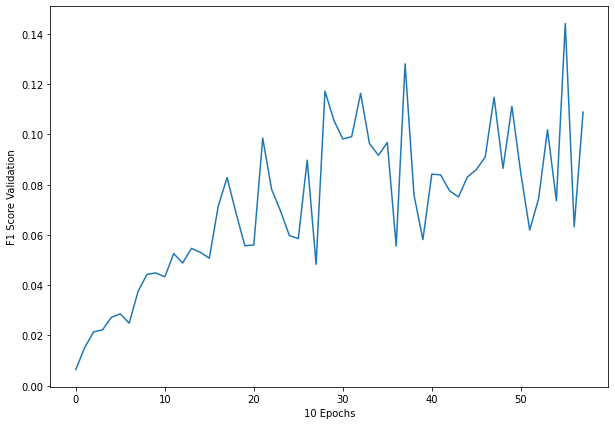

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(f1_p)
plt.xlabel('10 Epochs')
plt.ylabel('F1 Score Validation')

Text(0, 0.5, 'Accuracy')

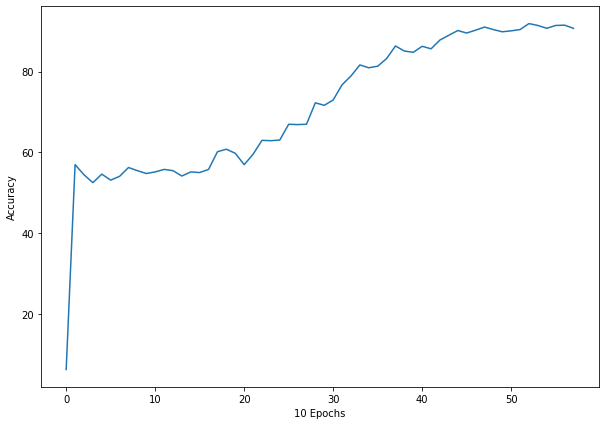

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(d_l_p)
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')

In [ ]:
noise = np.random.normal(0, 1, (250000, 10))
x_gen = generator.predict(noise)
print(x_gen.shape)
#y_gen = discriminator.predict(x_gen)
#print(len(y_gen[0]),len(y_gen[1]))
#print(y_gen)
_ , ygen = discriminator.predict(x_gen)

labels_gen = np.argmax(ygen,axis=1)

print(labels_gen)
labels_fraude_indx = np.where(labels_gen==2)[0]

labels_fraude_indx = np.random.choice(labels_fraude_indx, 1024-394, replace=False)

print(len(labels_fraude_indx))

gen_x_data = x_gen[labels_fraude_indx]


train_0_indxx = np.random.choice(np.where(y_train == 0)[0], 1024, replace=False)
train_1_indxx = np.where(y_train == 1)[0]


indx = np.concatenate((train_0_indxx, train_1_indxx), axis=0)
print(indx.shape)

X_trrain_under = X_train[indx]
y_trrain_under = y_train[indx]
gen_y_data = np.ones((len(gen_x_data)))#ygen[labels_fraude_indx]
X_res_gan = np.concatenate((X_trrain_under, gen_x_data), axis=0)
y_res_gan = np.concatenate((y_trrain_under, gen_y_data), axis=0)



# #X_res_gan, y_res_gan = rus.fit_sample(X_train_gen, Y_train_gen)

# print('\nDespués del sobre muestreo, dimensiones del conjunto train_X: {}'.format(X_res_gan.shape))
# print('Después del sobre muestreo, dimensiones del conjunto train_y: {} \n'.format(y_res_gan.shape))

print("Después del sobre muestreo, conteo de clases '1': {}".format(sum(y_res_gan==1)))
print("Después del sobre muestreo, conteo de clases '0': {}".format(sum(y_res_gan==0)))



(250000, 29)
[0 0 0 ... 0 0 0]
630
(1418,)
Después del sobre muestreo, conteo de clases '1': 1024
Después del sobre muestreo, conteo de clases '0': 1024


#Entrenar el clasificador con la GAN 

In [ ]:
#@title LogisticRegression GAN
#Encontrar el parametro optimo "C" 
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_res_gan, y_res_gan.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
#@title Mejor parametro y entrenamiento
best_param = clf.best_params_
best_param = best_param['C'] 
lr1 = LogisticRegression(C=best_param,penalty='l2', verbose=5)
lr1.fit(X_res_gan, y_res_gan.ravel()) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

Metrica de Recall en el dataset de entrenamiento: 88.77551020408163%
Metrica de presición en el dataset de entrenamiento: 99.98012072143709%


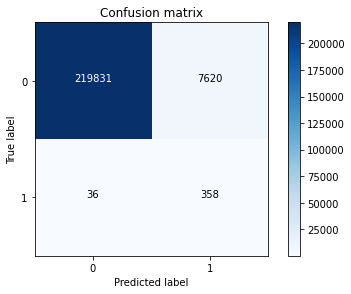

In [ ]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Metrica de Recall en el dataset de entrenamiento: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Metrica de presición en el dataset de entrenamiento: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Metrica de Recall en el dataset de Testeo: 82.65306122448979%
Metrica de presición en el dataset de testeo: 99.96903517240123%


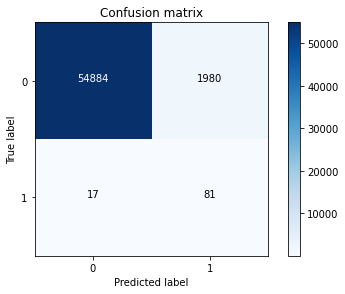

In [ ]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Metrica de Recall en el dataset de Testeo: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Metrica de presición en el dataset de testeo: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()